<a href="https://colab.research.google.com/github/brenoslivio/SCC0652_Computational_Visualization/blob/master/notebooks/Project-3/Projeto_3_Visualizacao_interativa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto 3 - Visualização interativa



<br>


**SCC0652 - Visualização Computacional (2020/2)**

<br>

[Projeto no GitHub](https://github.com/brenoslivio/SCC0652_Computational_Visualization)

<br>

**Alunos:**

Afonso Henrique Piacentini Garcia, Nº USP: 9795272

Breno Lívio Silva de Almeida, Nº USP: 10276675

Vitor Henrique Gratiere Torres, Nº USP: 10284952

---

## Sumário


1. [Descrição](#descricao)

  1.1 [dfPokemon.csv](#pokemoncsv)

2. [Desenvolvimento](#desenvolvimento)

  2.1 [Carregando os dados](#dados)

  2.2 [Cores das visualizações](#cores)

  2.3 [Interagindo com as visualizações dos dados](#visual)

    * [Outliers](#outliers)

    * [Correlação](#corr)

    * [Distribuição](#dist)

    * [Pokédex interativa](#pokedex)

## Descrição <a name="descricao"></a>



Essa parte do projeto da disciplina consiste na visualização interativa de um conjunto de dados, um dataset, que no projeto 1 foi previamente processado e analisado, e no projeto 2 foi visualizado de forma analítica. Alguns dos itens previamente visualizados analiticamente foram considerados relevantes para o desenvolvimento do projeto 3, e portanto serão utilizados.  Lembrando que o conjunto de dados escolhido foi o de Pokémons, do vídeo-game homônimo. Por fim, vamos usar o arquivo gerado do projeto 1 para o desenvolvimento dessa parte.

### [dfPokemon.csv](https://github.com/brenoslivio/SCC0652_Computational_Visualization/blob/master/notebooks/Project-3/dfPokemon.csv) <a name="pokemoncsv"></a>

*   cod: O número do pokémon na Pokédex;
*   name: O nome do pokémon;
*   generation: a qual geração o pokémon em questão pertence;
*   status: refere-se a raridade do pokémon, variando de normal até mítico;
*   species: apelido dado para cada pokémon baseado em algum de seus atributos;
*   form: discriminante de mega evoluções e outras formas;
*   type1: tipo do pokémon;
*   type2: segundo tipo do pokémon, caso possua.
*   height_m: altura do pokémon em metros;
*   weight_kg: peso do pokémon em kilogramas.
*   total: soma total dos stats do pokémon;
*   hp: stat que indica a vida base do pokémon;
*   attack: stat que indica o poder de ataque fisico base do pokémon;
*   defense: stat que indica a defesa física base do pokémon;
*   spatk: stat que indica o poder de ataque especial do pokémon;
*   spdef: stat que indica o poder de defesa especial do pokémon;
*   speed: stat que indica a velocidade base do pokémon;
*   img: link para a imagem do pokémon;




## Desenvolvimento <a name="desenvolvimento"></a>

Vamos criar visualizações interativas com os dados que temos.

### Carregando os dados <a name="dados"></a>

Vamos carregar os dados gerados no primeiro projeto. Vamos ler o csv já indicando o tipo de cada variável para o data frame em questão.



In [6]:
import io
import requests
from PIL import Image as IImage
from io import BytesIO

import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from IPython.display import Image
from IPython.core.display import HTML

from ipywidgets import HBox, VBox, widgets, GridspecLayout, Layout, Label
from ipywidgets import Image as ipyImage
from ipywidgets import HTML as ipyHTML

In [7]:
dfPokemon = pd.read_csv(
    "https://raw.githubusercontent.com/brenoslivio/SCC0652_Computationa"
    + "l_Visualization/master/notebooks/Project-2/dfPokemon.csv",
    dtype={
        "cod": str,
        "name": str,
        "generation": np.int32,
        "status": str,
        "species": str,
        "form": str,
        "type1": str,
        "type2": str,
        "height_m": np.float64,
        "weight_kg": np.float64,
        "total": np.int32,
        "hp": np.int32,
        "attack": np.int32,
        "defense": np.int32,
        "spatk": np.int32,
        "spdef": np.int32,
        "speed": np.int32,
        "img": str,
    },
    na_values="",
)

dfPokemon.sample(5)

,cod,name,generation,status,species,form,type1,type2,height_m,weight_kg,total,hp,attack,defense,spatk,spdef,speed,img
848,729,Brionne,7,Normal,Pop Star Pokémon,NaN,Water,NaN,0.6,17.5,420,60,69,69,91,81,50,https://img.pokemondb.net/sprites/home/normal/...
700,602,Tynamo,5,Normal,EleFish Pokémon,NaN,Electric,NaN,0.2,0.3,275,35,55,40,45,40,60,https://img.pokemondb.net/sprites/home/normal/...
500,421,Cherrim,4,Normal,Blossom Pokémon,NaN,Grass,NaN,0.5,9.3,450,70,60,70,87,78,85,https://img.pokemondb.net/sprites/home/normal/...
821,710,Pumpkaboo,6,Normal,Pumpkin Pokémon,Large Size,Ghost,Grass,0.5,7.5,335,54,66,70,44,55,46,https://img.pokemondb.net/sprites/home/normal/...
988,857,Hattrem,8,Normal,Serene Pokémon,NaN,Psychic,NaN,0.6,4.8,370,57,40,65,86,73,49,https://img.pokemondb.net/sprites/home/normal/...


### Cores das visualizações <a name="cores"></a>



Novamente, como na etapa anterior, iremos usar cores específicas que se associam aos tipos de Pokémons que temos no conjunto de dados.

In [8]:
colorsType = {
    "Bug": "#a6b91a",
    "Dark": "#705746",
    "Dragon": "#6f35fc",
    "Electric": "#f7d02c",
    "Fairy": "#d685ad",
    "Fighting": "#c22e28",
    "Fire": "#ee8130",
    "Flying": "#a98ff3",
    "Ghost": "#735797",
    "Grass": "#7ac74c",
    "Ground": "#e2bf65",
    "Ice": "#96d9d6",
    "Normal": "#a8a77a",
    "Poison": "#a33ea1",
    "Psychic": "#f95587",
    "Rock": "#b6a136",
    "Steel": "#b7b7ce",
    "Water": "#6390f0",
}

cinza = "#808080"
transparente = "rgba(0,0,0,0)"

### Interagindo com as visualizações dos dados <a name="visual"></a>

Vamos desenvolver vários tipos de visualizações interativas, inclusive revisitando visualizações feitas no projeto anterior. Dessa forma espera-se criar um sistema de visualização analítica que nos permita explorar e entender mais ainda sobre nossos dados.

#### Outliers <a name="outliers"></a>

Vamos utilizar a mesma ideia de possivelmente encontrar outliers usando de boxplot novamente. Dessa vez iremos usar a versão interativa do Plotly que nos permite visualizar até mesmo quem seria os outliers, além dos quartis dele. Para isso iremos trabalhar com widgets que irão permitir até mesmo mostrar a figura do Pokémon que está com o hover ativado.

In [12]:
fig = go.FigureWidget(data=[
        dict(
            type = 'box',
            x = dfPokemon["generation"],
            y = dfPokemon["total"],
            customdata = dfPokemon,
            hovertemplate ='Pokémon: %{customdata[1]} <br>Status: %{customdata[3]}  <br>Total: %{y} <br>hp: %{customdata[11]} <br>' + 
                  'attack: %{customdata[12]} <br>defense: %{customdata[13]} <br>spatk: %{customdata[14]} <br>spdef: %{customdata[15]} <br>'+
                 'speed: %{customdata[16]}',
            boxpoints ='all',
            name = ''
        )
    ],)

details = ipyHTML()

fig.update_layout(
    hoverlabel=dict(
        bgcolor="white",
        font_size=16,
        font_family="Rockwell"
    )
)

boxplot = fig.data[0]

image_widget = ipyImage(
    value = requests.get(dfPokemon["img"][0]).content,
    layout = Layout(border='2px solid black', justify_content = 'center', height='250px', width='250px')
)

def hover_fn(trace, points, state):
    ind = points.point_inds[0]

    # Coloca os detalhes do pokémon numa tabela
    details.value = dfPokemon.iloc[ind][1:10].to_frame().to_html()

    # Atualiza imagem
    image_widget.value = requests.get(dfPokemon["img"][ind]).content

boxplot.on_hover(hover_fn)

vBox = VBox([image_widget, details])
vBox.layout = Layout(justify_content = 'center')

finalBox = HBox([fig, vBox])
finalBox.layout = Layout(justify_content = 'center')

display(finalBox)

    'data': [{'boxpoints': 'all',
              'customdata': array([['001', 'Bu…

#### Correlação <a name="corr"></a>

No projeto 2, havíamos criado um Scatter plot analítico para enxergar melhor uma correlação pouco esperada nos dados analisados, no caso a relação entre o peso e a altura dos Pokémons, que no geral se mostrou mutualmente  crescente. Dessa vez, decidimos recriar este gráfico em sua forma interativa, na qual além de ser possível visualizar a correlação explicada anteriormente, podem-se checar informações específicas de qualquer um dos pontos no gráfico. No caso, as informações que podem ser checadas são o nome do Pokémon, seu id (ou código), a forma do Pokémon, seus tipos, sua altura e seu peso.

In [103]:
fig = go.Figure()

# Definicao do layout
fig.update_layout(
    plot_bgcolor=transparente,
    font_color=cinza,
    autosize=True,
    height=550,
    margin=dict(l=0, r=0, t=25, b=0),
    title_text="Gráfico de peso [kg em log] para altura [m em log]",
    paper_bgcolor=transparente,
    xaxis=dict(
        gridcolor=cinza,
        type="log",
        showspikes=True,
    ),
    yaxis=dict(
        gridcolor=cinza,
        type="log",
        showspikes=True,
    ),
)

for t in colorsType.keys():
    typeRows = dfPokemon.loc[:, "type1"] == t
    fig.add_trace(
        go.Scatter(
            x=dfPokemon.loc[typeRows, "weight_kg"],
            y=dfPokemon.loc[typeRows, "height_m"],
            name=t,
            mode="markers",
            customdata=dfPokemon.loc[typeRows, :],
            marker_color=dfPokemon.loc[typeRows, "type1"].map(
                colorsType
            ),
            hovertemplate=(
                "<b>%{customdata[0]} %{customdata[1]}</b><br>"
                + "%{text}"
                + "<extra>"
                + "Weight: %{x}kg<br>"
                + "Height: %{y}m<br>"
                + "Type 1: %{customdata[6]}<br>"
                # + "Type 2: %{customdata[7]}<br>"
                + "</extra>"
            ),
            # text=[
            #     "Forma " + str(x) + "<br>" if str(x) != "nan" else ""
            #     for x in dfPokemon.loc[typeRows, "form"].values
            # ],
            text=[
                "".join(
                    [
                        "Forma " + str(f) + "<br>"
                        if str(f) != "nan"
                        else "",
                        "Type 2: " + str(t) + "<br>"
                        if str(t) != "nan"
                        else "",
                    ]
                )
                for f, t in dfPokemon.loc[
                    typeRows, ["form", "type2"]
                ].values.tolist()
            ],
        )
    )

fig.show(renderer="colab")

#### Distribuição <a name="dist"></a>

No projeto 2, nós geramos diversos radar plots dos stats de cada tipo de pokémon e violin plots da soma total dos stats dos pokémons por geração, todos eles de forma estática. Para o projeto 3, percebemos que tais gráficos poderiam ser muito úteis para o projeto se realizados novamente, porém dessa vez de forma interativa. 

Primeiramente, fizemos um violin plot interativo para cada tipo de pokémon - contendo dentro de cada um o box plot equivalente - nos quais é possível checar diversos dados interessantes de cada violin plot, como o valor mínimo, o máximo, a média e a mediana. 

Em segundo lugar, fizemos um radar chart para cada tipo de pokémon, contendo a média dos stats dos pokémons daquele tipo específico.

In [5]:
# Rank por type1 de médias dos valores da variavel total
totalMean = dfPokemon.loc[:, ["total", "type1"]].groupby("type1").mean()
totalMean.sort_values(by="total", inplace=True)

# Categorias que serao mostradas no radar
categories = ["hp", "spatk", "spdef", "attack", "defense", "speed"]

# Definicao do numero de linhas e colunas de graficos de radares
# Linhas * Colunas tem que totalizar 18 (total de tipos de pokemons)
rows = 2
cols = 9

# Definicao de um dicionario para o layout dos graficos polares
polarLayout = dict(
    bgcolor=transparente,
    radialaxis=dict(
        range=[30, 120],
        showticklabels=False,
        dtick=20,
        tickfont_size=9,
        linecolor=cinza,
        gridcolor=cinza,
        tickcolor=cinza,
    ),
    angularaxis=dict(
        rotation=60,
        direction="clockwise",
        showticklabels=False,
        tickfont_size=9,
        linecolor=cinza,
        tickcolor=cinza,
        gridcolor=cinza,
    ),
)

# Definicao da altura (proporcional) do grafico de violino
# 1 - violinHight sera aultura dividids entre as linhas de radares
violinHight = 0.6
heights = [(1 - violinHight) / rows] * (rows + 1)
heights[0] = violinHight

# Definicao do tipo do grafico de cada subplot
# A primeira linha sera um unico grafico de violino
row1 = [None] * cols
row1[0] = {"colspan": cols, "type": "xy"}
specsC = [row1]
# Todos da segunda linha serao graficos polares
rowsRadars = [{"type": "polar"}] * cols
specsC += [rowsRadars] * rows

# Criacao dos subplots
fig = make_subplots(
    rows=rows + 1,
    cols=cols,
    shared_xaxes="all",
    shared_yaxes="all",
    vertical_spacing=0,
    horizontal_spacing=0,
    row_heights=heights,
    specs=specsC,
)

for i, t in enumerate(totalMean.index):
    typeRows = dfPokemon.loc[:, "type1"] == t

    # Plot dos graficos de violino
    fig.add_trace(
        go.Violin(
            x=dfPokemon.loc[typeRows, "type1"],
            y=dfPokemon.loc[typeRows, "total"],
            name=t,
            legendgroup=t,
            scalegroup=t,
            box_visible=True,
            meanline_visible=True,
            points="outliers",
            line_color=colorsType[t],
        ),
        row=1,
        col=1,
    )

    # Plot dos graficos de radar
    fig.add_trace(
        go.Scatterpolar(
            r=dfPokemon.loc[typeRows, categories].mean(),
            theta=categories,
            fill="toself",
            name=t,
            line_color=colorsType[t],
            legendgroup=t,
            showlegend=False,
            hovertemplate="mean %{theta}: %{r:.2f}",
        ),
        row=(i // cols) + 2,
        col=(i % cols) + 1,
    )
    # Layout dos graficos de radar
    fig.update_layout(
        # Essa expressao se traduz em {polar+str(i): polarLayout}
        **{["polar" + str(x) for x in range(1, 19)][i]: polarLayout}
    )


fig.update_layout(
    # Layout do grafico como um todo
    font_color=cinza,
    autosize=True,
    height=600,
    margin=dict(l=0, r=0, t=25, b=0),
    title_text="Distribuição do Total e Médias dos stats por Tipo",
    paper_bgcolor=transparente,
    # Layout do grafico de violino
    plot_bgcolor=transparente,
    xaxis=dict(ticks="", showticklabels=False),
    yaxis=dict(title="Total", gridcolor=cinza),
    violingap=0.1,
    violingroupgap=0.1,
    # Colocando os eixos no primeiro radar
    polar1=dict(
        radialaxis=dict(showticklabels=True),
        angularaxis=dict(showticklabels=True),
    ),
)

fig.show(renderer="colab")

Após isso, decidimos agrupar todos os radar charts realizados anteriormente em um único spider chart, tornando a visualização da comparação entre a média dos stats de cada tipo de pokémon ainda mais clara.


In [7]:
fig = go.Figure()

for t in colorsType.keys():
    if t == "NaN":
        continue
    fig.add_trace(
        go.Scatterpolar(
            r=dfPokemon.loc[
                dfPokemon.loc[:, "type1"] == t, categories
            ].mean(),
            theta=categories,
            fill="none",
            name=t,
            line_color=colorsType[t],
            hovertemplate="mean %{theta}: %{r:.2f}",
        )
    )

fig.update_layout(
    font_color=cinza,
    autosize=True,
    height=500,
    margin=dict(l=0, r=0, t=25, b=0),
    title_text="Médias dos stats por Tipo",
    paper_bgcolor=transparente,
    polar=dict(
        bgcolor=transparente,
        radialaxis=dict(
            range=[40, 120],
            linecolor=cinza,
            gridcolor=cinza,
            tickcolor=cinza,
        ),
        angularaxis=dict(
            rotation=120,
            direction="clockwise",
            linecolor=cinza,
            tickcolor=cinza,
            gridcolor=cinza,
        ),
    ),
)

fig.show(renderer="colab")

#### Pokédex interativa <a name="pokedex"></a>




![Pokedex](https://pa1.narvii.com/5744/4e0161f94017b5ea55795e72eb1031fa017f2854_hq.gif)

Na série de jogos Pokémon, a Pokédex é uma ferramenta indispensável na jornada de qualquer treinador Pokémon, expondo várias informações relevantes sobre qualquer Pokémon que esse treinador já tenha encontrado durante a sua jornada.

Baseando-se nas funcionalidades da Pokédex dos jogos, criamos a nossa versão, que apesar de mais simples que a original, cumpre muito bem a função de servir como, provavelmente, a melhor forma de se visualizar os dados obtidos pelo nosso dataset de forma interativa. Nela, os usuários podem pesquisar por um Pokémon usando o seu id na pokédex original, ou escolhê-lo de uma lista sequencial, que sempre se inicia no pokémon de id 1, Bulbasauro. A Pokédex irá exibir o nome do pokémon, sua imagem, seu tipo (ou seus tipos, se tiver mais de um), seu peso, sua altura, seu id e sua espécie, além de um gráfico de radar com todos os seus stats.

Para a próxima interação gostaríamos de exibir os tipos pokemons com as suas imagens originais, então achamos esse arquivo com todos os tipos pokemons, porém precisamos cortá-lo.

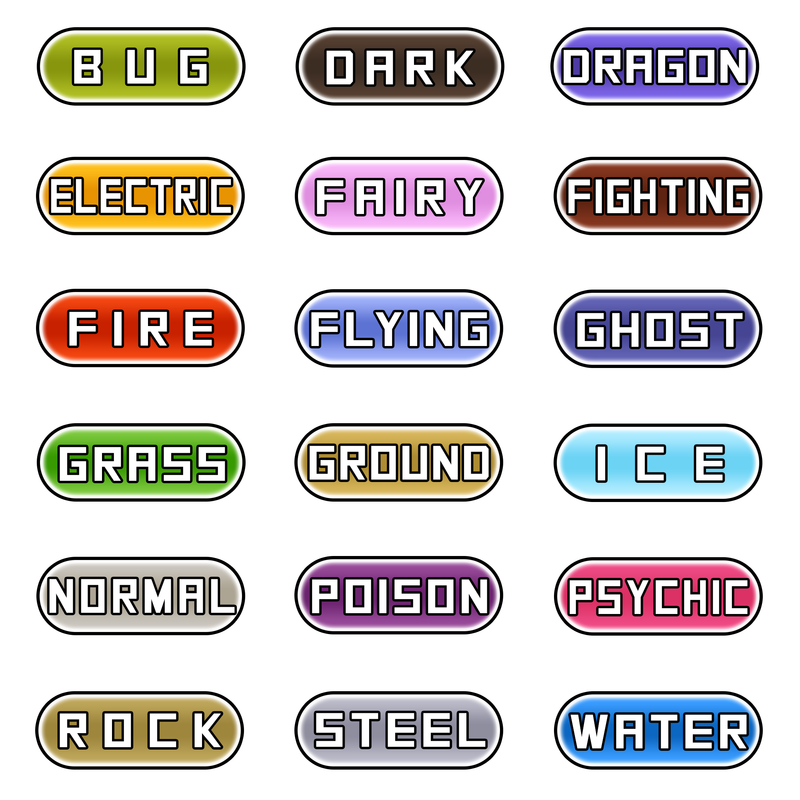

In [13]:
response = requests.get(
    "https://raw.githubusercontent.com/brenoslivio/SCC0652_Computationa"
    + "l_Visualization/master/notebooks/Project-3/types.png"
)
IImage.open(BytesIO(response.content))

In [5]:
# Lista com todos os nomes dos tipos para o titulo de cada imagem
typeNames = list(colorsType.keys())

# Carrega a imagem
response = requests.get(
    "https://raw.githubusercontent.com/brenoslivio/SCC0652_Computationa"
    + "l_Visualization/master/notebooks/Project-3/types.png"
)
allTypes = IImage.open(BytesIO(response.content))
# O tamanho de cada badge eh esse pois tem 3 colunas e 6 linas
eachSize = (allTypes.size[0] / 3, allTypes.size[1] / 6)

for j in range(0, 6):
    for i in range(0, 3):
        # Cortando
        newtype = allTypes.crop(
            (
                eachSize[0] * i,
                eachSize[1] * j,
                eachSize[0] * (i + 1),
                eachSize[1] * (j + 1),
            )
        )

        # A funcao 'getbbox' pega as dimensoes da imagem onde
        # ha pixels nao transparentes
        newtype = newtype.crop(newtype.getbbox())

        # Salvando a imagem
        newtype.save(typeNames[i + j * 3] + ".png")

Agora iremos fazer a Pokédex funcionando em si, permitindo a busca dos pokémons, visualização dos stats, entre outros.

In [10]:
# declaração de um Layout para utilizar nas celulas da nossa grid
# e centralizando os objetos que nelas forem colocados
grid_layout = Layout(
    justify_items="center",
)

# criação da grid
grid = GridspecLayout(14, 15, height="550px", layout=grid_layout)


def pokedex(query):
    matches = None

    # Pesquisa
    try:
        # Procura por numero
        int(query)
        matches = dfPokemon.loc[dfPokemon.loc[:, "cod"] == query, :]
    except:
        # pega o erro jogado pela função int() significando um
        # input de texto

        # Porcura por nome
        query = query.casefold()
        matches = dfPokemon.loc[
            dfPokemon.loc[:, "name"].str.lower() == query, :
        ]

    # Se achou alguma coisa
    try:
        index = matches.index.tolist()[0]
        update_fields(index)

    # Se nao achou
    except:
        name.value = "Nada encontrado"
        species.value = ""
        height_m.value = ""
        weight_kg.value = ""
        with img:
            display(none)
        with stats:
            display(none)
        with type1:
            display(none)
        with type2:
            display(none)


query = widgets.Text(
    value="001",
    placeholder="Nome ou Número",
    description="Pokemon: ",
    disabled=False,
)

none = widgets.Label(value="")

name = widgets.Label(value="")
species = widgets.Label(value="")
height_m = widgets.Label(value="")
weight_kg = widgets.Label(value="")

# definimos uma função sem operação porque a definição de um
# 'widgets.interactive_output' pede uma função como parametro
# e se colocássemos a função que faz a pokedex toda vez que
# algo mudasse a função pokedex seria chamada 6 vezes
def no_op(query):
    """Função sem operação."""
    pass


img = widgets.interactive_output(pokedex, {"query": query})
stats = widgets.interactive_output(no_op, {"query": query})
type1 = widgets.interactive_output(no_op, {"query": query})
type2 = widgets.interactive_output(no_op, {"query": query})
stderr = widgets.interactive_output(no_op, {"query": query})
next_imgs = widgets.interactive_output(no_op, {"query": query})


def next_description(index):
    """Cria a descrição para um botão dado um index do dataframe."""

    cod = dfPokemon.loc[index, "cod"]
    name = dfPokemon.loc[index, "name"]
    form = dfPokemon.loc[index, "form"]
    desc = cod + ": " + name
    if str(form) != "nan":
        desc = desc + " (" + form + ")"
    return desc


def on_click_b(button):
    """Execução do clique de um botão"""

    index = int(button.tooltip)
    query.value = dfPokemon.loc[index, "cod"]
    update_fields(index)


def button(i, style=""):
    """Cria um botão e retorna o objeto."""

    b = widgets.Button(
        description=next_description(i),
        disabled=False,
        # style = ['success', 'info', 'warning', 'danger', '']
        button_style=style,
        tooltip=str(i),
        layout={"width": "max-content"},
    )
    b.on_click(on_click_b)

    return b


def update_buttons(index):
    """Atualiza a lista de botões."""

    range_ = np.array(range(index - 2, index + 3))
    if np.amin(range_) < 0:
        range_ = range_ - np.amin(range_)
    if np.amax(range_) >= dfPokemon.shape[0]:
        range_ = range_ + (dfPokemon.shape[0] - np.amax(range_)) - 1
    for i, b in enumerate(range_):
        with next_imgs:
            display(Image(url=dfPokemon.loc[b, "img"], width=25))
        grid[9 + i, 9:14] = button(b)
        if b == index:
            grid[9 + i, 9:14] = button(b, "success")


def update_fields(index):
    """Atualiza o valor de cada campo da pokedex dado um indice do dataframe."""

    name.value = next_description(index)
    species.value = dfPokemon.loc[index, "species"]

    height_m.value = (
        "Altura: " + str(dfPokemon.loc[index, "height_m"]) + "m"
    )
    weight_kg.value = (
        "Peso: " + str(dfPokemon.loc[index, "weight_kg"]) + "kg"
    )

    update_buttons(index)
    with img:
        img.clear_output()
        display(Image(url=dfPokemon.loc[index, "img"], width=325))
    with stats:
        stats.clear_output()
        display(radar(index))
    with type1:
        type1.clear_output()
        display(
            Image(
                url=(dfPokemon.loc[index, "type1"] + ".png"),
                width=80,
            )
        )
    with type2:
        type2.clear_output()
        if str(dfPokemon.loc[index, "type2"]) == "nan":
            display(none)
        else:
            display(
                Image(
                    url=(dfPokemon.loc[index, "type2"] + ".png"),
                    width=80,
                )
            )


def radar(pokemon):
    """Plota um grafico de radar com os stats de um pokemon do dataframe"""

    fig = go.Figure()

    fig.add_trace(
        go.Scatterpolar(
            r=dfPokemon.loc[pokemon, categories],
            theta=categories,
            fill="toself",
            name=dfPokemon.loc[pokemon, "name"],
            line_color=colorsType[dfPokemon.loc[pokemon, "type1"]],
            hovertemplate="%{theta}: %{r}",
        )
    )

    fig.update_layout(
        font_color=cinza,
        autosize=True,
        height=310,
        margin=dict(l=0, r=0, t=25, b=0),
        paper_bgcolor=transparente,
        polar=dict(
            bgcolor=transparente,
            radialaxis=dict(
                range=[0, 260],
                linecolor=cinza,
                gridcolor=cinza,
                tickcolor=cinza,
            ),
            angularaxis=dict(
                rotation=120,
                direction="clockwise",
                linecolor=cinza,
                tickcolor=cinza,
                gridcolor=cinza,
            ),
        ),
    )

    return fig


grid[0, 1:6] = query
grid[1:10, 1:7] = img
grid[0:9, 8:14] = stats
grid[10, 1:4] = name
grid[10, 4:7] = species
grid[11, 1:4] = height_m
grid[11, 4:7] = type1
grid[12, 1:4] = weight_kg
grid[12, 4:7] = type2
grid[9:14, 8] = next_imgs
update_buttons(0)

grid

GridspecLayout(children=(Text(value='001', description='Pokemon: ', layout=Layout(grid_area='widget007'), plac…

> Note: normalmente aparece um erro na primeira execução da pokedex, se isso acontecer, por favor só clique em algum pokemóm na lista a direita ou procure por um número ou nome.